<a href="https://colab.research.google.com/github/TFmohamedyahia/image_classification/blob/main/img_classi_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(len(train_labels))
print(train_labels[:30])
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]
(10000, 28, 28)
10000


In [27]:
# normalization / scaling
train_images = train_images / 255.0
test_images = test_images / 255.0

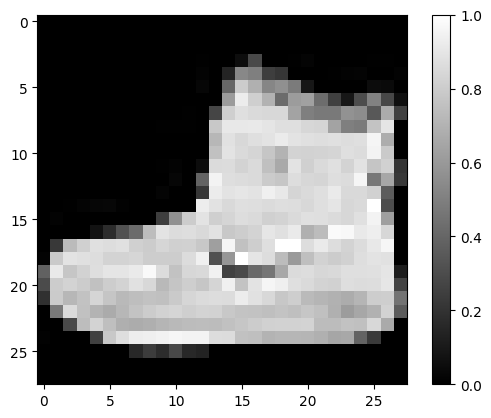

In [28]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

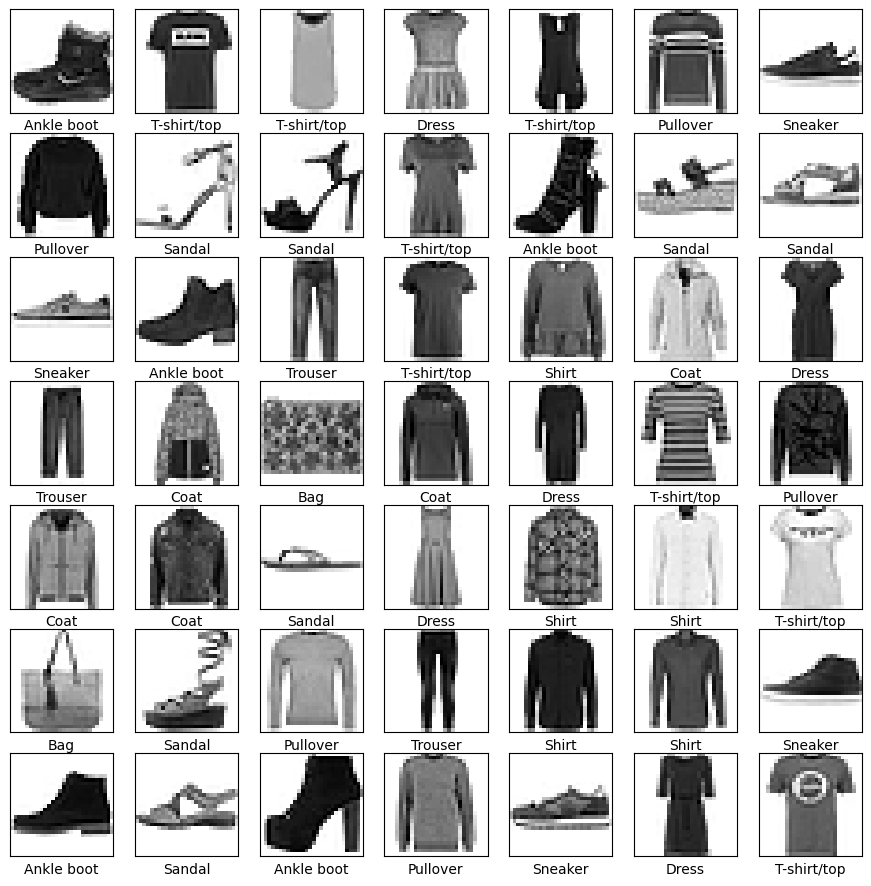

In [43]:
plt.figure(figsize=(11,11))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4959 - accuracy: 0.8256
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3737 - accuracy: 0.8648
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3351 - accuracy: 0.8763


In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3677 - accuracy: 0.8649


In [65]:
predictions = model.predict(test_images)
n = 10
print(predictions[n])
print(f"prediction: {predictions[n].argmax()} => {class_names[predictions[n].argmax()]}")
print(f"correct Ans: {test_labels[n]} => {class_names[test_labels[n]]}")

313/313 [==============================] - 1s 3ms/step
[5.9765753e-05 1.5603002e-06 2.2863464e-01 2.5571244e-06 7.3351854e-01
 4.2809672e-05 3.7730824e-02 2.2877333e-07 8.7132184e-06 2.7841006e-07]
prediction: 4 => Coat
correct Ans: 4 => Coat
